In [1]:
import pygrib as pg
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import xesmf as xe

In [3]:
# Spatial resolution of the NLDAS data
NLDAS_res = 0.125

# NLDAS file name (Grib file)
nldas_file = 'NLDAS_FORA0125_H.A20100603.0800.002.grb'

# Names of the NetCDF files containing the XLAT and XLONG variables. Note that
# in this case I just used the ncks utility in the NetCDF Climate Operators (NCO)
# package to subset the XLAT and XLONG variables into new files from the wrfout
# output files from some simulations
wrf_lat_file = 'xlat_d02.nc'
wrf_lon_file = 'xlong_d02.nc'

# Open those NetCDF files 
nc_wrf_lat_fid = nc.Dataset(wrf_lat_file, 'r')
nc_wrf_lon_fid = nc.Dataset(wrf_lon_file, 'r')

wrf_lats = nc_wrf_lat_fid.variables['XLAT'][0,:,:]
wrf_lons = nc_wrf_lon_fid.variables['XLONG'][0,:,:]


In [4]:
# Open the NLDAS grib file 
grbs = pg.open(nldas_file) # Open the file
grb = grbs[10] # Get the 10th variable, which is precipitation

data = grb.values
lat,lon = grb.latlons()

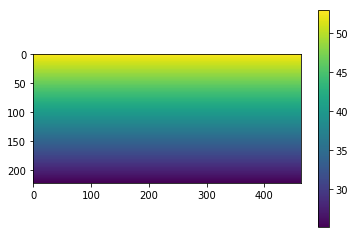

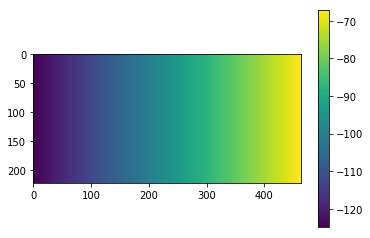

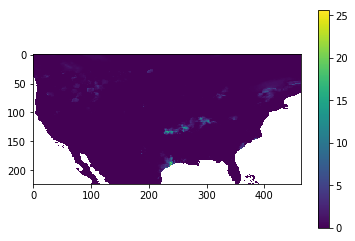

In [12]:
plt.imshow(np.flipud(lat))
plt.colorbar()
plt.show()
plt.imshow(np.flipud(lon))
plt.colorbar()
plt.show()
plt.imshow(np.flipud(data))
plt.colorbar()
plt.show()


In [20]:
grid_in = {'lon': lon[0,:],
           'lat': lat[:,0]
          }

grid_out = {'lon': wrf_lons[0,:],
            'lat': wrf_lats[:,0]
           }

In [29]:
regridder = xe.Regridder(grid_in, grid_out, 'nearest_s2d')
regridder.clean_weight_file()
regridder

Create weight file: nearest_s2d_224x464_327x348.nc
Remove file nearest_s2d_224x464_327x348.nc


xESMF Regridder 
Regridding algorithm:       nearest_s2d 
Weight filename:            nearest_s2d_224x464_327x348.nc 
Reuse pre-computed weights? False 
Input grid shape:           (224, 464) 
Output grid shape:          (327, 348) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

In [30]:
data_out = regridder(data)
print(data_out.shape)

(327, 348)


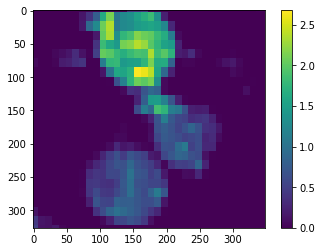

In [31]:
plt.imshow(data_out)
plt.colorbar()
plt.show()